In [35]:
import sys
print("версия Python: {}".format(sys.version))

import pandas as pd
print("версия pandas: {}".format(pd.__version__))

import matplotlib
print("версия matplotlib: {}".format(matplotlib.__version__))

import numpy as np
print("версия NumPy: {}".format(np.__version__))

import scipy as sp
print("версия SciPy: {}".format(sp.__version__))

import IPython
print("версия IPython: {}".format(IPython.__version__))

import sklearn
print("версия scikit-learn: {}".format(sklearn.__version__))

import mglearn
print("версия mglearn: {}".format(mglearn.__version__))

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

версия Python: 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]
версия pandas: 1.3.3
версия matplotlib: 3.4.3
версия NumPy: 1.21.2
версия SciPy: 1.7.1
версия IPython: 7.28.0
версия scikit-learn: 1.0
версия mglearn: 0.1.9


In [36]:
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


In [77]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [79]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


In [80]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [81]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

In [82]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


Гребневая регрессия
В качестве синонима использует термин «ридж-регрессия». – Прим. пер.
12 С математической точки зрения Ridge штрафует L2 норму коэффициентов или евклидову длину
w.

В гребневой регрессии коэффициенты (w)
выбираются не только с точки зрения того, насколько хорошо они
позволяют предсказывать на обучающих данных, они еще подгоняются в
соответствии с дополнительным ограничением. Нам нужно, чтобы
величина коэффициентов была как можно меньше. Другими словами, все
элементы w должны быть близки к нулю. Это означает, что каждый
признак должен иметь как можно меньшее влияние на результат (то есть
каждый признак должен иметь небольшой регрессионный коэффициент)
и в то же время он должен по-прежнему обладать хорошей прогнозной
силой. Это ограничение является примером регуляризации
(regularization). Регуляризация означает явное ограничение модели для
предотвращения переобучения.

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))


Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


Менее сложная модель означает меньшую правильность
на обучающем наборе (т.к. все обучающая данные она просто не в состоянии запомнить, ей не хватает "нейронов", её обощение не позволяет ей покрыть весь обучающий набор), но лучшую обобщающую способность. Поскольку
нас интересует только обобщающая способность, мы должны выбрать
модель Ridge вместо модели LinearRegression.

Важно отметить, что сложность модели тесно связана с изменчивостью
входных данных, содержащихся в вашем обучающем наборе: чем больше
разнообразие точек данных в вашем наборе, тем более сложную модель
можно использовать, не беспокоясь о переобучении. Обычно больший
объем данных дает большее разнообразие, таким образом, большие
наборы данных позволяют строить более сложные модели. Однако
простое дублирование одних и тех же точек данных или сбор очень
похожих данных здесь не поможет.
Возвращаясь к продажам лодок, можно сказать, что если бы у нас
было более 10000 строк данных о клиентах и все они подчинялись бы
правилу «если клиент старше 45 лет, у него менее трех детей, либо трое
и он женат, то он скорее всего купит лодку», мы бы с гораздо большей
вероятностью поверили в это правило, чем если бы оно было
сформулировано лишь по 12 строкам таблицы 2.1.
Увеличение объема данных и построение более сложных моделей
часто творят чудеса при решении задач машинного обучения с учителем.
В этой книге мы сосредоточимся на работе с данными фиксированного
размера. В действительности вы, как правило, сами можете определить
объем собираемых данных, и это может оказаться более полезным, чем
корректировка и настройка вашей модели. Никогда не стоит
недооценивать преимущества увеличения объема данных.


In [84]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [85]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))


Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


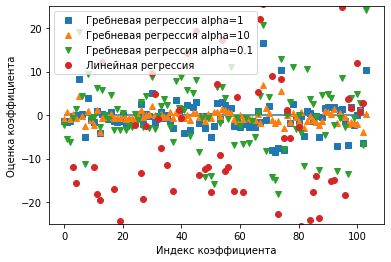

In [86]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
# как увеличить размер диаграммы?

На рис. 2.13 приводятся графики, которые
показывают качество работы модели в виде функции от объема набора
данных, их еще называют кривыми обучения (learning curves):

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

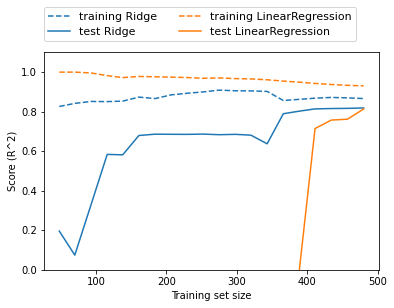

In [87]:
mglearn.plots.plot_ridge_n_samples()

Урок здесь состоит в том, что
при достаточном объеме обучающих данных регуляризация становится
менее важной и при удовлетворительном объеме данных гребневая и
линейная регрессии будут демонстрировать одинаковое качество работы
(тот факт, что в данном случае это происходит при использовании
полного набора данных, является просто случайностью). Еще одна
интересная деталь рис. 2.13 – это снижение правильности линейной
регрессии на обучающем наборе. С возрастанием объема данных модели
становится все сложнее переобучиться или запомнить данные.

Альтернативой Ridge как метода регуляризации линейной регрессии
является Lasso.

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


 Лассо штрафует L1 норму вектора коэффициентов или, другими словами, сумму абсолютных
значений коэффициентов.

In [90]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))


Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [91]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))


Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


In [92]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")


Text(0, 0.5, 'Оценка коэффициента')

На практике, когда стоит выбор между гребневой регрессией и лассо,
предпочтение, как правило, отдается гребневой регрессии. Однако, если
у вас есть большое количество признаков и есть основания считать, что
лишь некоторые из них важны, Lasso может быть оптимальным выбором.
Аналогично, если вам нужна легко интерпретируемая модель, Lasso
поможет получить такую модель, так как она выберет лишь
подмножество входных признаков. В библиотеке scikit-learn также
имеется класс ElasticNet, который сочетает в себе штрафы Lasso и Ridge.
На практике эта комбинация работает лучше всего, впрочем, это
достигается за счет двух корректируемых параметров: один для L1
регуляризации, а другой – для L2 регуляризации.

# Линейные модели также широко используются в задачах классификации

Для линейных моделей регрессии выход
y
ˆ
является линейной
функцией признаков: линией, плоскостью или гиперплоскостью (для
большого количества измерений). Для линейных моделей
классификации граница принятия решений (decision boundary) является
линейной функцией аргумента. Другими словами, (бинарный) линейный
классификатор – это классификатор, который разделяет два класса с
помощью линии, плоскости или гиперплоскости. В этом разделе мы
приведем кокретные примеры.


Существует масса алгоритмов обучения линейных моделей. Два
критерия задают различия между алгоритмами:
• Измеряемые метрики качества подгонки обучающих данных;
• Факт использования регуляризации и вид регуляризации, если она
используется.
Различные алгоритмы по-разному определяют, что значит «хорошая
подгонка обучающих данных». В силу технико-математических причин
72
невозможно скорректировать w и b, чтобы минимизировать количество
неверно классифицированных случаев, выдаваемое алгоритмами, как
можно было бы надеяться. С точки зрения поставленных нами целей и
различных сфер применения различные варианты метрик качества
подгонки (так называемые функции потерь или loss functions) не имеют
большого значения.


Двумя наиболее распространенными алгоритмами линейной
классификации являются логистическая регрессия (logistic regression),
реализованная в классе linear_model.LogisticRegression, и линейный
метод опорных векторов (linear support vector machines) или линейный
SVM, реализованный в классе svm.LinearSVC (SVC расшифровывается
как support vector classifier – классификатор опорных векторов).
Несмотря на свое название, логистическая регрессия является
алгоритмом классификации, а не алгоритмом регрессии, и его не следует
путать с линейной регрессией

In [95]:
mglearn.datasets.make_forge()

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

c:\python37\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


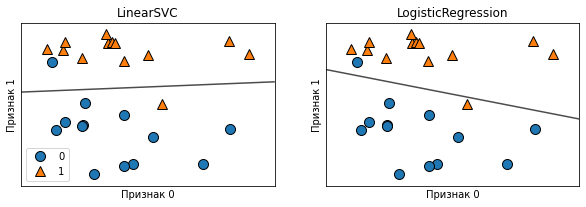

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Признак 0")
 ax.set_ylabel("Признак 1")
axes[0].legend()


Для LogisticRegression и LinearSVC компромиссный параметр,
который определяет степень регуляризации, называется C, и более
высокие значения C соответствуют меньшей регуляризации. Другими
словами, когда вы используете высокое значение параметра C,
LogisticRegression и LinearSVC пытаются подогнать модель к
обучающим данным как можно лучше, тогда как при низких значениях
параметра C модели делают больший акцент на поиске вектора
коэффициентов (w), близкого к нулю

Существует еще одна интересная деталь, связанная с работой
параметра C. Использование низких значений C приводит к тому, что
алгоритмы пытаются подстроиться под «большинство» точек данных,
тогда как использование более высоких значений C подчеркивает
важность того, чтобы каждая отдельная точка данных была
классифицирована правильно. Ниже приводится иллюстрация
использования LinearSVC (рис. 2.16):

In [54]:
mglearn.plots.plot_linear_svc_regularization()

Переобучение в большинстве случаев проявляется в том, что в получающихся многочленах слишком большие коэффициенты. Соответственно, необходимо добавить в целевую функцию штраф за слишком большие коэффициенты.

Модель на графике справа старается изо всех сил
правильно классифицировать все точки, но не может дать хорошего
обобщения сразу для обоих классов. Другими словами, эта модель скорее
всего переобучена.
Как и в случае с регрессией, линейные модели классификации могут
показаться слишком строгими в условиях низкоразмерного
пространства, предлагая границы принятия решений в виде прямых
линий или плоскостей. Опять же, при наличии большого числа
измерений линейные модели классификации приобретают высокую
прогнозную силу и с увеличением числа признаков защита от
переобучения становится все более важной

https://habr.com/ru/post/105220/

In [101]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.946
Правильность на тестовом наборе: 0.958


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [102]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.937
Правильность на тестовом наборе: 0.930


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [103]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.944
Правильность на тестовом наборе: 0.965


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [104]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))


Правильность на обучающем наборе: 0.937
Правильность на тестовом наборе: 0.930


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


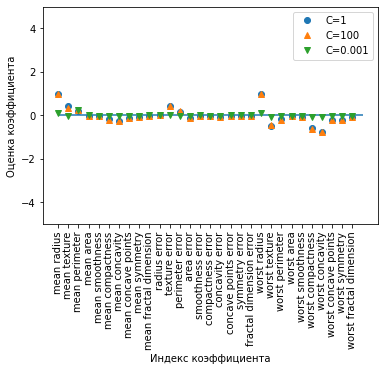

In [62]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()


Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92
Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96
Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


c:\python37\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


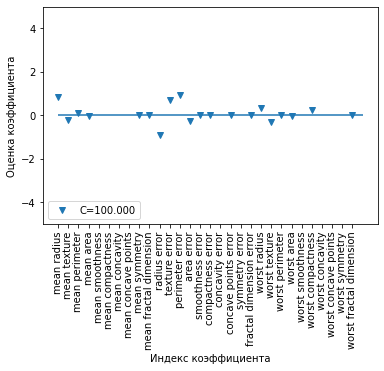

In [72]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
 print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend(loc=3)

# Линейные модели для мультиклассовой классификации

In [105]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [107]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


In [109]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))


In [110]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1") 

Text(0, 0.5, 'Признак 1')